In [276]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

In [277]:
# Fonction de lecture du fichier csv

def read_csv(filename):
    try:
        global data_csv
        data_csv = pd.read_csv(filename, sep=",", engine='python')
        return data_csv
    except Exception as e:
        print(e)

In [278]:
# Lecture du fichier CSV Iris

file = read_csv('dataset.csv')
print(file.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [279]:
file.info()           # give infos about the types of each cols
file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [280]:
# Déclaration de variables

le = preprocessing.LabelEncoder()

In [281]:
# Vérification de présence de valeur null

file.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [282]:
data_null_drop = file.dropna()

In [283]:
# Vérification de présence de valeur null

data_null_drop.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

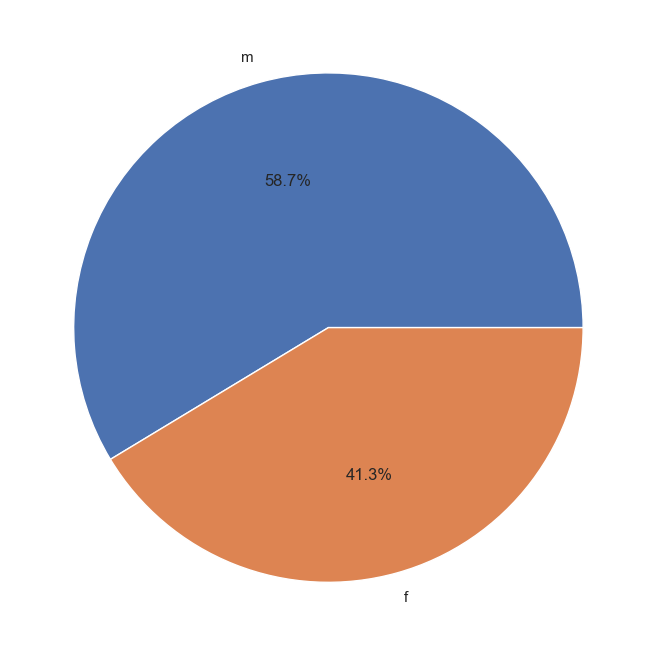

In [284]:
# Affiche la répartition des resultats présents dans le DataFrame par catégorie

ax = file['sex'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('')
ax.set_ylabel('')
plt.show()

In [285]:
# Affiche la moyenne 

fl = file.groupby('sex')['age'].mean()
clear_output()
print(fl)

sex
f    3.976744
m    3.728814
Name: age, dtype: float64


In [16]:
# Affiche la moyenne 

fl = file.groupby('Pop')['age'].mean()
clear_output()
print(fl)

Pop
Vic      4.022727
other    3.689655
Name: age, dtype: float64


In [18]:
# Affiche la moyenne 

fl = file.groupby('Pop')['skullw'].mean()
clear_output()
print(fl)

Pop
Vic      56.654348
other    57.065517
Name: skullw, dtype: float64


In [19]:
# Affiche la moyenne 

fl = file.groupby('Pop')['totlngth'].mean()
clear_output()
print(fl)

Pop
Vic      87.467391
other    86.787931
Name: totlngth, dtype: float64


In [20]:
# Affiche la moyenne 

fl = file.groupby('Pop')['taill'].mean()
clear_output()
print(fl)

Pop
Vic      35.934783
other    37.862069
Name: taill, dtype: float64


In [21]:
# Affiche la moyenne 

fl = file.groupby('Pop')['footlgth'].mean()
clear_output()
print(fl)

Pop
Vic      72.397778
other    65.403448
Name: footlgth, dtype: float64


In [22]:
# Affiche la moyenne 

fl = file.groupby('Pop')['earconch'].mean()
clear_output()
print(fl)

Pop
Vic      52.186957
other    44.913793
Name: earconch, dtype: float64


In [24]:
# Affiche la moyenne 

fl = file.groupby('Pop')['eye'].mean()
clear_output()
print(fl)

Pop
Vic      14.871739
other    15.184483
Name: eye, dtype: float64


In [25]:
# Affiche la moyenne 

fl = file.groupby('Pop')['chest'].mean()
clear_output()
print(fl)

Pop
Vic      27.445652
other    26.646552
Name: chest, dtype: float64


In [26]:
# Affiche la moyenne 

fl = file.groupby('Pop')['belly'].mean()
clear_output()
print(fl)

Pop
Vic      32.663043
other    32.525862
Name: belly, dtype: float64


In [ ]:
# Affiche la moyenne 

fl = file.groupby('Pop')['hdlngth'].mean()
clear_output()
print(fl)

Pop
Vic      92.597826
other    92.606897
Name: hdlngth, dtype: float64


In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler_nx = MinMaxScaler()
fit_file = scaler_nx.fit_transform(fl_encoded)
fit_file_pd = pd.DataFrame(fit_file, columns = [fl_encoded.columns])

In [408]:
print(fl_encoded)

     site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1    0    1  8.0     94.1    60.4      89.0   36.0      74.5   
1       1    0    0  6.0     92.5    57.6      91.5   36.5      72.5   
2       1    0    0  6.0     94.0    60.0      95.5   39.0      75.4   
3       1    0    0  6.0     93.2    57.1      92.0   38.0      76.1   
4       1    0    0  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...  ...  ...  ...      ...     ...       ...    ...       ...   
99      7    1    1  1.0     89.5    56.0      81.5   36.5      66.0   
100     7    1    1  1.0     88.6    54.7      82.5   39.0      64.4   
101     7    1    0  6.0     92.4    55.0      89.0   38.0      63.5   
102     7    1    1  4.0     91.5    55.2      82.5   36.5      62.9   
103     7    1    0  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  15.2   28.0   36.0  
1        51.2  16.0   28.5   33.0  
2        51.9  15.5   30.0 

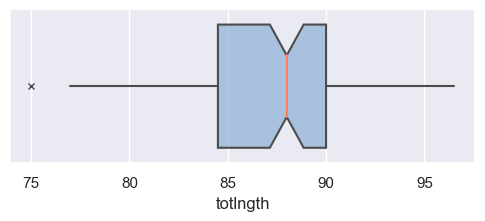

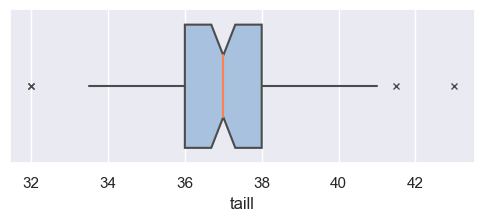

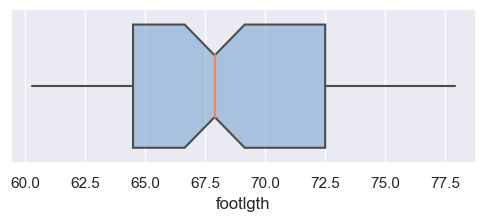

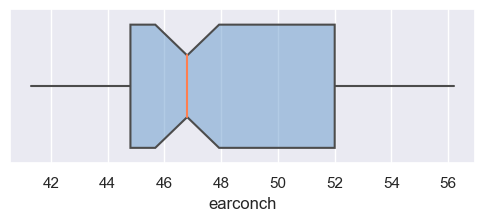

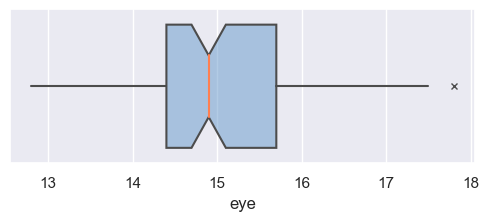

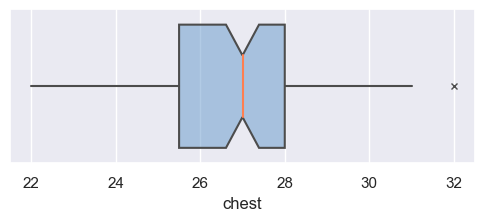

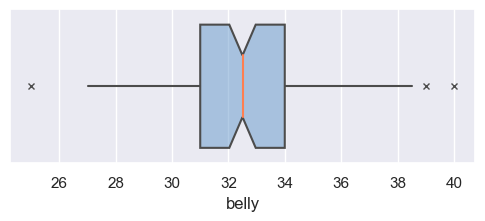

In [417]:
sns.set(rc={'figure.figsize':(6,2)})
for i in range(6,13):
    column = fl_encoded.columns[i]
    sns.boxplot(data=fl_encoded, x=column,     notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},)
    plt.show()

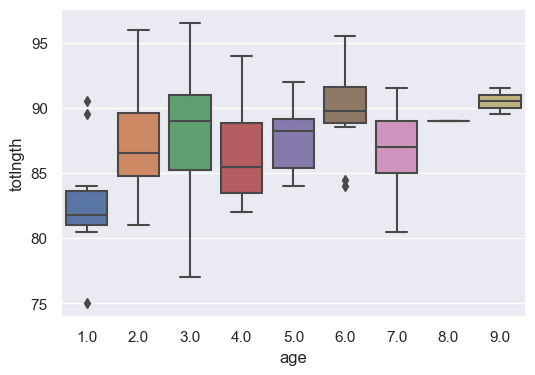

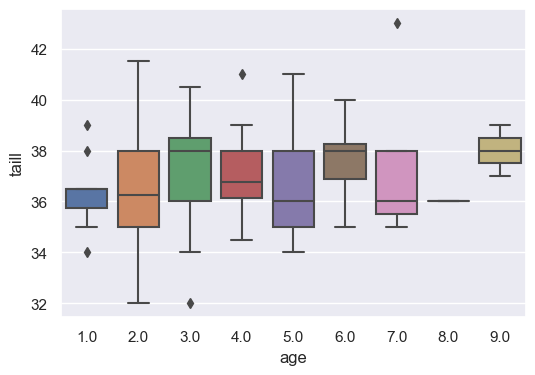

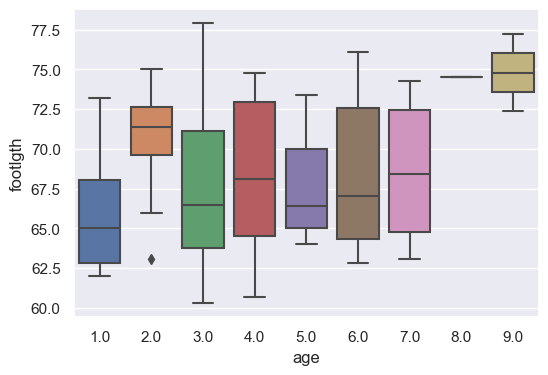

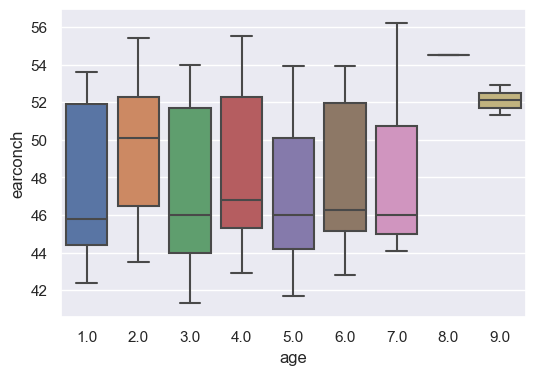

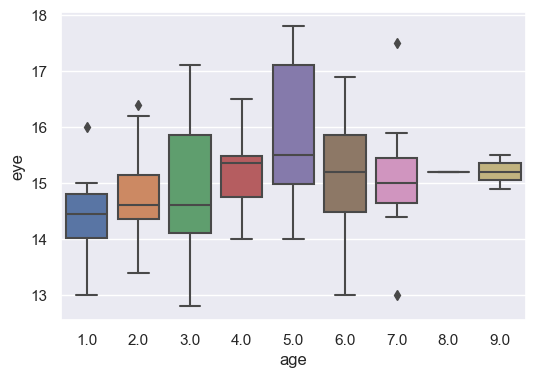

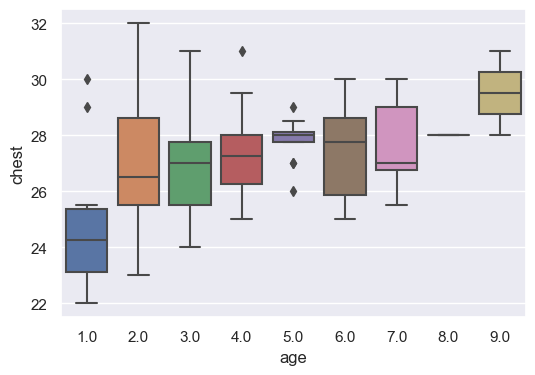

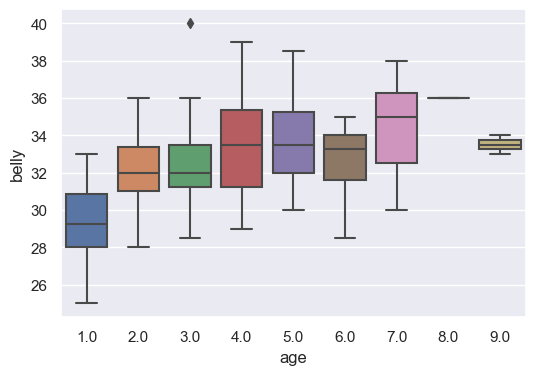

In [419]:
sns.set(rc={'figure.figsize':(6,4)})
for i in range(6,13):
    column = fl_encoded.columns[i]
    sns.boxplot(data=fl_encoded, x="age", y=column)
    plt.show()

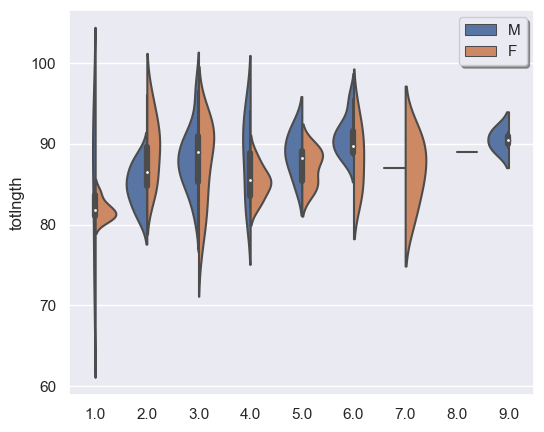

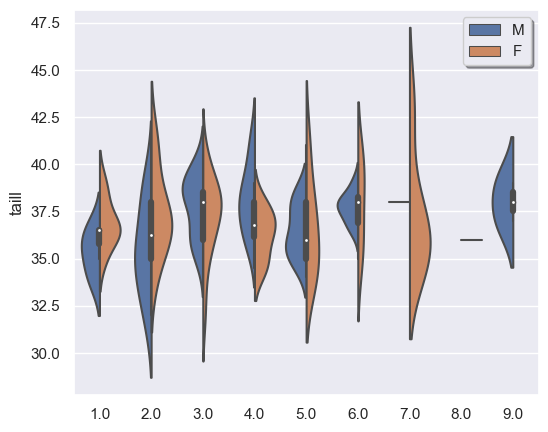

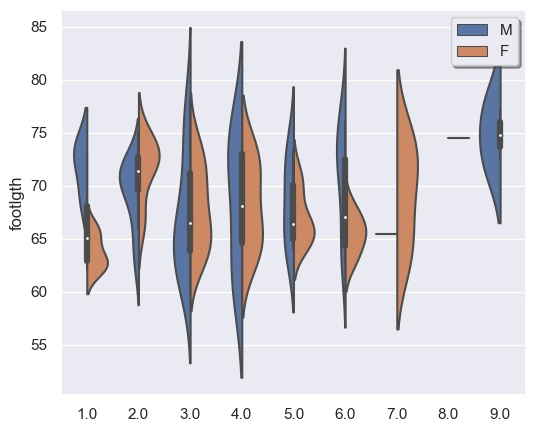

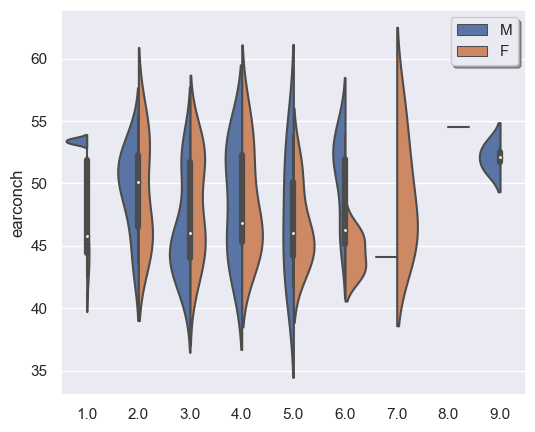

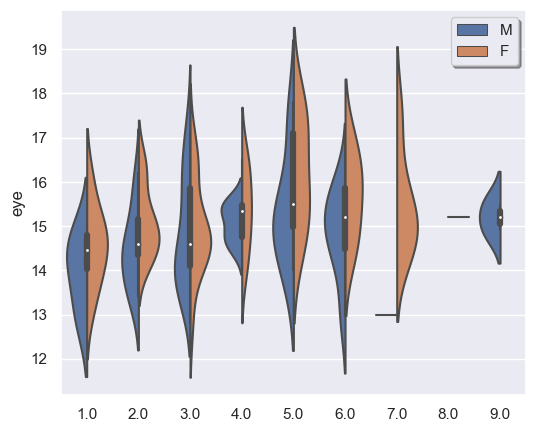

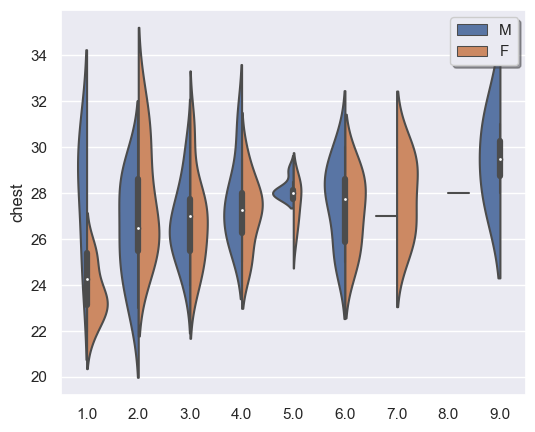

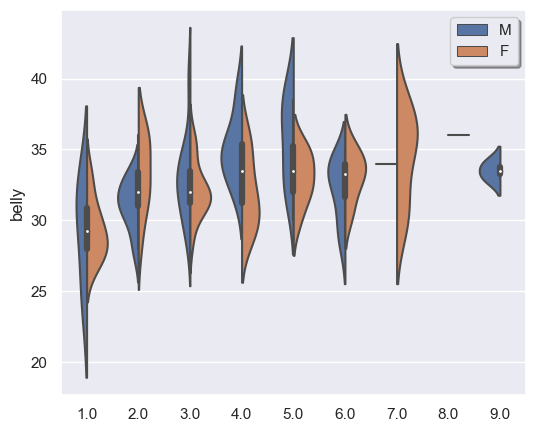

In [420]:
sns.set(rc={'figure.figsize':(6,5)})
for i in range(6,13):
    column = fl_encoded.columns[i]
    ax = sns.violinplot(x="age",y=column, hue="sex", data=fl_encoded,split=True)
    ax.set(xlabel='', ylabel=column)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['M', 'F'], loc='upper right', shadow=True)
    # plt.legend(title = "")
    plt.show()

[Text(0.5, 0, 'site'),
 Text(1.5, 0, 'Pop'),
 Text(2.5, 0, 'sex'),
 Text(3.5, 0, 'age'),
 Text(4.5, 0, 'hdlngth'),
 Text(5.5, 0, 'skullw'),
 Text(6.5, 0, 'totlngth'),
 Text(7.5, 0, 'taill'),
 Text(8.5, 0, 'footlgth'),
 Text(9.5, 0, 'earconch'),
 Text(10.5, 0, 'eye'),
 Text(11.5, 0, 'chest'),
 Text(12.5, 0, 'belly')]

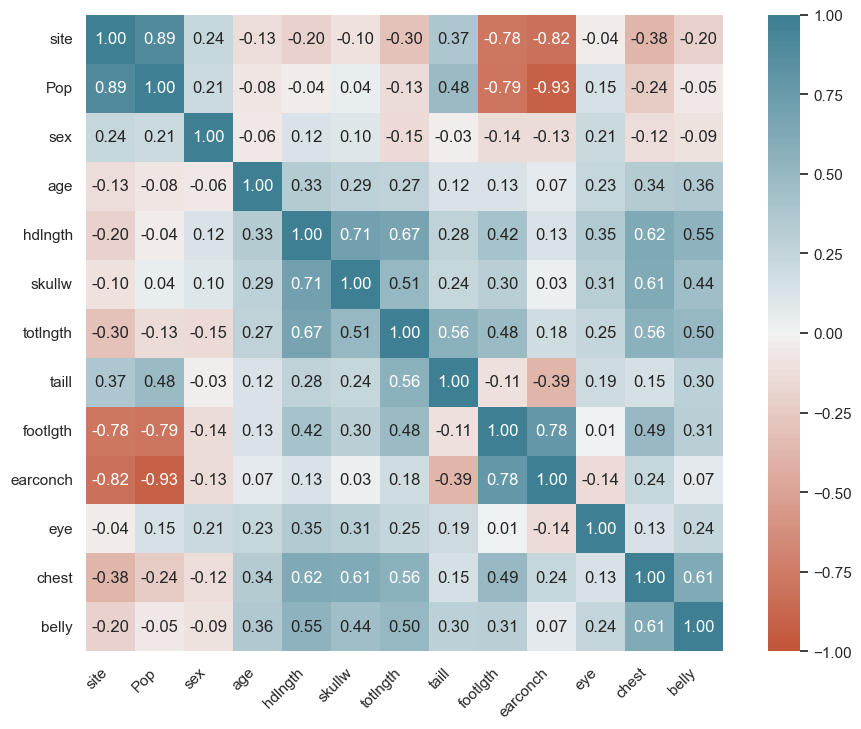

In [289]:
corr = fl_encoded.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    fmt=".2f",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [58]:
# Affiche le tableau des mesures max et min

for i in range(5,14):
    column = file.columns[i]
    fl_min = file.groupby('Pop')[column].min()
    fl_max = file.groupby('Pop')[column].max()
    # clear_output()
    print("Min",column ,fl_min,"\n")
    print("Max",column ,fl_max,"\n")

Min hdlngth Pop
Vic      84.7
other    82.5
Name: hdlngth, dtype: float64 

Max hdlngth Pop
Vic       96.3
other    103.1
Name: hdlngth, dtype: float64 

Min skullw Pop
Vic      51.5
other    50.0
Name: skullw, dtype: float64 

Max skullw Pop
Vic      67.7
other    68.6
Name: skullw, dtype: float64 

Min totlngth Pop
Vic      75.0
other    80.5
Name: totlngth, dtype: float64 

Max totlngth Pop
Vic      96.5
other    96.0
Name: totlngth, dtype: float64 

Min taill Pop
Vic      32.0
other    34.0
Name: taill, dtype: float64 

Max taill Pop
Vic      39.5
other    43.0
Name: taill, dtype: float64 

Min footlgth Pop
Vic      62.7
other    60.3
Name: footlgth, dtype: float64 

Max footlgth Pop
Vic      77.9
other    73.2
Name: footlgth, dtype: float64 

Min earconch Pop
Vic      40.3
other    41.3
Name: earconch, dtype: float64 

Max earconch Pop
Vic      56.2
other    48.0
Name: earconch, dtype: float64 

Min eye Pop
Vic      13.0
other    12.8
Name: eye, dtype: float64 

Max eye Pop
Vic   

In [99]:
data_null_drop.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', length=101)

In [290]:
# Convertion des valeurs "string" en "int" de la colonne Spicies

data_null_drop["Pop"]=le.fit_transform(data_null_drop["Pop"])

data_null_drop["sex"]=le.fit_transform(data_null_drop["sex"])


# Création d'un DataFrame avec les valeurs transformées

fl_encoded = data_null_drop

fl_encoded = fl_encoded.drop(['case'], axis=1)

fl_encoded.head()


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_21724\1135774719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null_drop["Pop"]=le.fit_transform(data_null_drop["Pop"])
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_21724\1135774719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null_drop["sex"]=le.fit_transform(data_null_drop["sex"])


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [330]:
# Séparation valeurs et resultats

feature_columns = ['site','Pop','sex','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']
X = fl_encoded[feature_columns].values
y = fl_encoded['age'].values

c:\VENV\venv_win\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\VENV\venv_win\lib\site-packages\sklearn\model_selection\_validation.py:1651: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 100.
  warnings.warn(


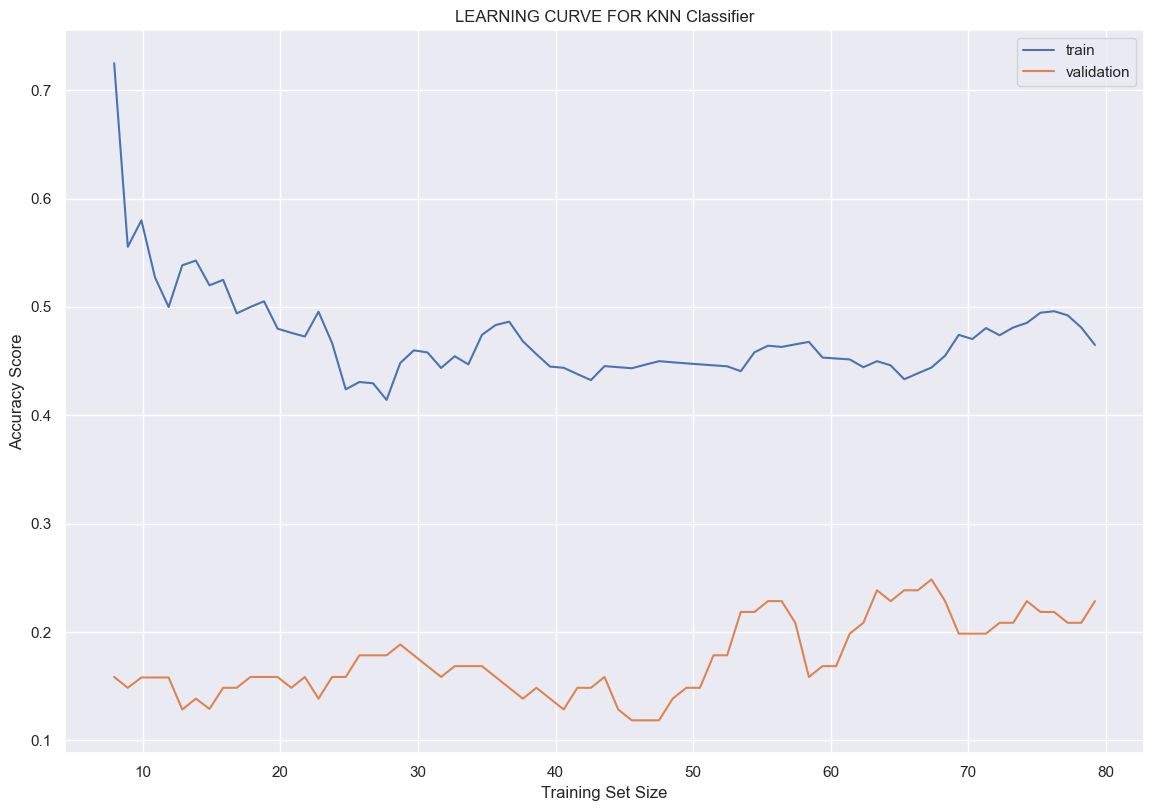

In [211]:
# Affiche la meilleur répartition pour la découpe du jeu de données

model = KNeighborsClassifier()
N, train_score, val_score = learning_curve(model, X, y, train_sizes = np.linspace(0.1, 1, 100),  cv=5, scoring='accuracy')
plt.plot(N/X.shape[0]*100, train_score.mean(axis=1), label='train')
plt.plot(N/X.shape[0]*100, val_score.mean(axis=1), label='validation')
# clear_output()
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [292]:
# Séparation du jeu de données en deux

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.68)

In [295]:
# Features Selection - Varaince Threshold

selector = VarianceThreshold(threshold=0.2)
print("Variance Var", X.var(axis=0))
selector.fit_transform(X)
selector.get_support()
np.array(feature_columns)[selector.get_support()]

Variance Var [ 9.53130281 17.43876091  3.84903441 19.28613469 16.32322321  7.36692481]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 6

In [160]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
print(f_regression(X,y))
fs = SelectKBest(score_func=f_regression, k=6)
# apply feature selection
X_selected = fs.fit_transform(X, y)
fs.get_support()
print(np.array(feature_columns)[fs.get_support()])
print(X_selected.shape)

(array([ 1.64086314,  0.64610706,  0.33209819, 12.05793487,  8.78986357,
        7.67911961,  1.45145753,  1.60198583,  0.43622649,  5.62437601,
       12.51729934, 14.81775276]), array([2.03199708e-01, 4.23433812e-01, 5.65734068e-01, 7.66142636e-04,
       3.79541302e-03, 6.67342557e-03, 2.31166381e-01, 2.08592590e-01,
       5.10483308e-01, 1.96470799e-02, 6.15620986e-04, 2.09976266e-04]))
['hdlngth' 'skullw' 'totlngth' 'eye' 'chest' 'belly']
(101, 6)


In [303]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

SGD = SelectFromModel(SGDClassifier(), threshold='mean')
SGD.fit_transform(X, y)
print(np.array(feature_columns)[SGD.get_support()])

['hdlngth' 'totlngth' 'taill' 'footlgth' 'earconch' 'belly']


In [331]:
from sklearn.feature_selection import RFE, RFECV

RCV = RFECV(SGDClassifier(), step=1, min_features_to_select=4, cv=4)

RCV.fit_transform(X, y)
print(np.array(feature_columns)[RCV.get_support()])
RCV.ranking_

c:\VENV\venv_win\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


['skullw' 'totlngth' 'taill' 'footlgth' 'earconch' 'belly']


array([3, 7, 6, 2, 1, 1, 1, 1, 1, 5, 4, 1])

In [373]:
# Séparation valeurs et resultats

new_features = np.array(feature_columns)[SGD.get_support()]
X = fl_encoded[new_features].values
y = fl_encoded['age'].values

# Régression polynomiale

In [333]:
from sklearn.preprocessing import PolynomialFeatures

ppoly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)

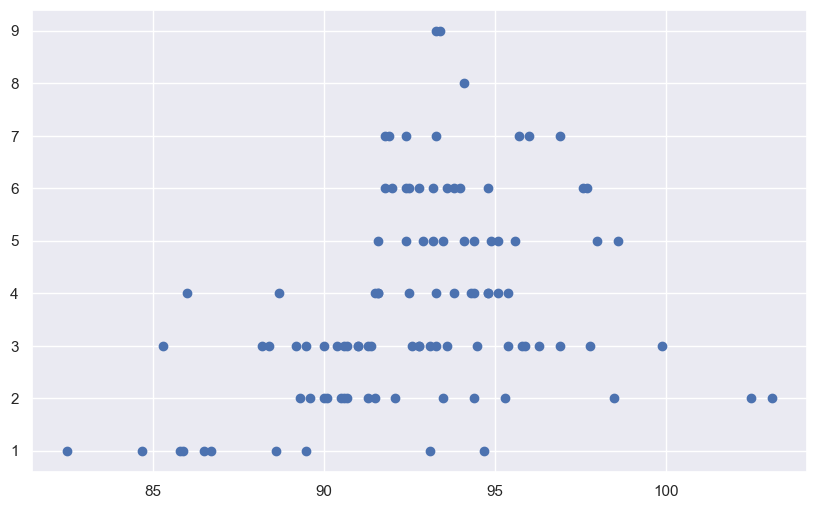

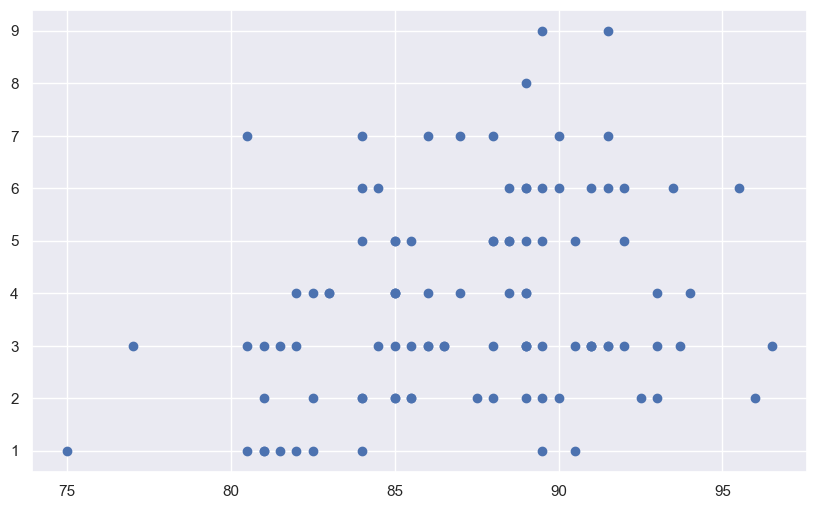

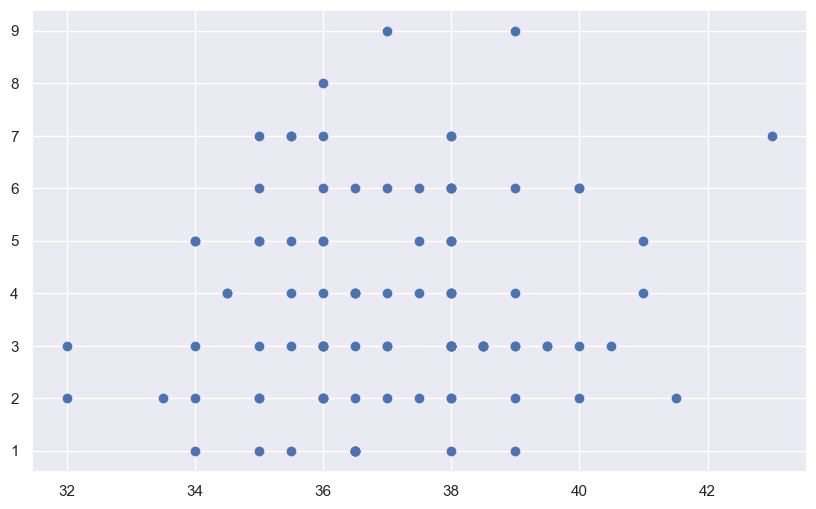

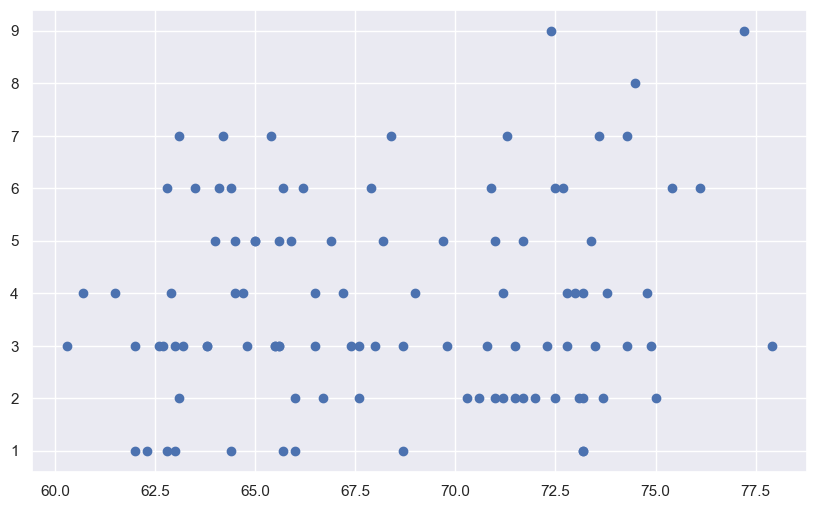

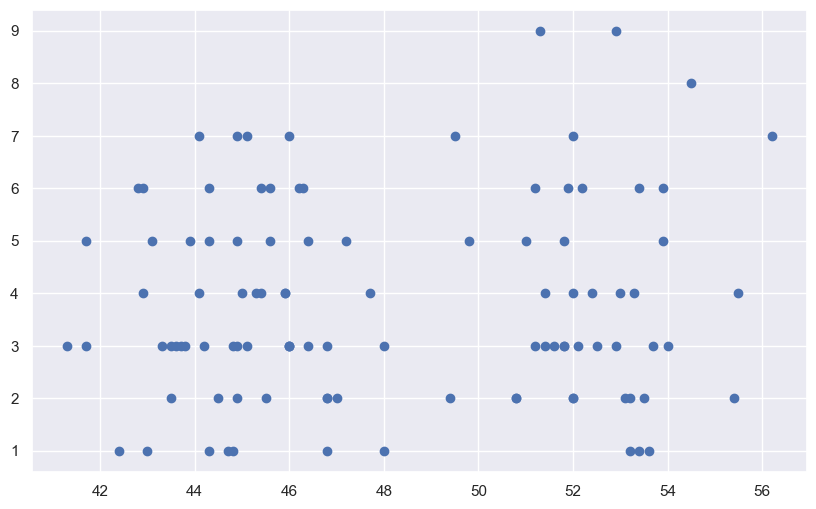

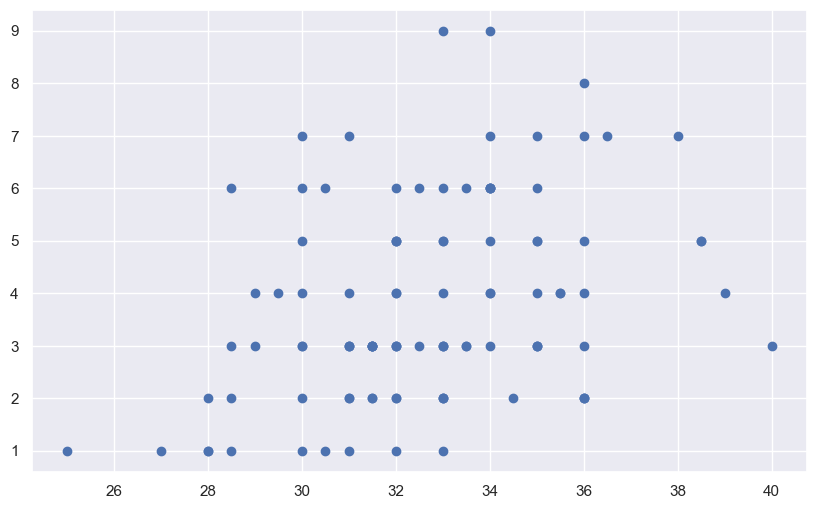

In [314]:
for i in new_features:
    plt.figure(figsize=(10,6))
    plt.scatter(fl_encoded[i].values,fl_encoded["age"].values)

In [334]:
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

2.0249535178720084

# Regression Linéaire

In [226]:
# Modules
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# Création du modèle
regression = linear_model.LinearRegression()


In [421]:

# Entrainement du modèle
regression.fit(X_train, y_train)

# Prédiction
y_pred = regression.predict(X_test)

# Compare
print("Compare",np.stack((y_pred, y_test), axis=1))

# Calcule performance du modèle (MSE)
print("MSE : ", np.mean((y_test - y_pred)**2))

# ou 

from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_test, y_pred)))

Compare [[3.33093499 4.        ]
 [3.14749401 2.        ]
 [3.88617991 2.        ]
 [3.08503613 2.        ]
 [3.49906672 6.        ]
 [4.62874822 8.        ]
 [3.97073002 3.        ]
 [2.84756188 3.        ]
 [4.66270513 6.        ]
 [5.7088464  5.        ]
 [2.83779406 2.        ]
 [3.95650067 6.        ]
 [4.14995328 5.        ]
 [3.17886906 4.        ]
 [4.70777128 2.        ]
 [2.59321638 3.        ]
 [4.28643025 6.        ]
 [3.86452797 3.        ]
 [4.96362786 3.        ]
 [4.21475704 4.        ]
 [4.21827858 5.        ]
 [4.03406939 2.        ]
 [4.57327241 4.        ]
 [6.45355349 2.        ]
 [3.89460353 3.        ]
 [3.67252103 4.        ]
 [2.44892731 1.        ]
 [4.5091444  5.        ]
 [3.91377434 1.        ]
 [6.23502825 2.        ]
 [4.036905   9.        ]
 [4.64387758 4.        ]
 [3.29337774 2.        ]]
MSE :  3.940545813732034
1.985080807859477


# KNN Classifier

In [383]:
# Séparation valeurs et resultats

new_features = np.array(feature_columns)[SGD.get_support()]
X = fl_encoded[new_features].values
y = fl_encoded['age'].values

In [385]:
# Séparation du jeu de données en deux

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.68)

In [388]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [338]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [397]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.32900030576263
RMSE value for k=  2 is: 2.2002066018692634
RMSE value for k=  3 is: 2.079238399807084
RMSE value for k=  4 is: 1.9981051630042503
RMSE value for k=  5 is: 1.8612475451273063
RMSE value for k=  6 is: 1.7943514064131836
RMSE value for k=  7 is: 1.8135066671130753
RMSE value for k=  8 is: 1.772848674941667
RMSE value for k=  9 is: 1.7780934063249212
RMSE value for k=  10 is: 1.8371585438256315
RMSE value for k=  11 is: 1.8193522403606686
RMSE value for k=  12 is: 1.7897717251881113
RMSE value for k=  13 is: 1.7441209940706643
RMSE value for k=  14 is: 1.7264628834171167
RMSE value for k=  15 is: 1.700465375002529
RMSE value for k=  16 is: 1.7162947339068437
RMSE value for k=  17 is: 1.7171854921556842
RMSE value for k=  18 is: 1.7871177211771205
RMSE value for k=  19 is: 1.7908100835870928
RMSE value for k=  20 is: 1.8043927879852917
RMSE value for k=  21 is: 1.8307781898198943
RMSE value for k=  22 is: 1.8221891101139258
RMSE value for k=  23 is

<AxesSubplot: >

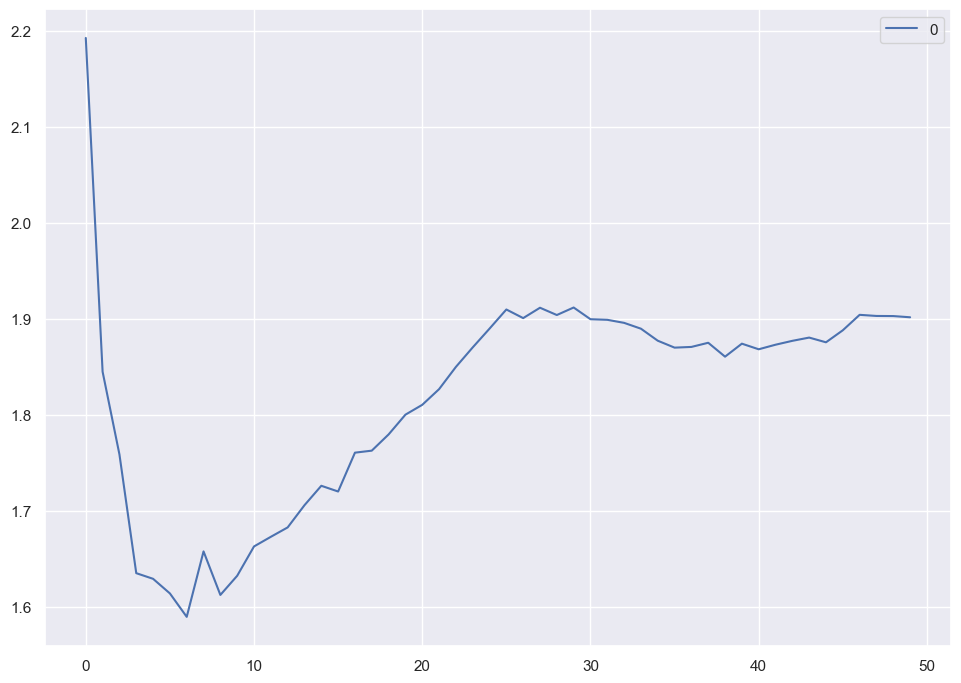

In [342]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [398]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(2,40)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40)})

In [399]:
# Affiche le meilleur score posible

model.best_score_

0.15097542393081276

In [400]:
# Affiche les meilleurs paramètres

model.best_params_

{'n_neighbors': 9}

In [401]:
# Test les paramètres sur le jeu de données test

model = model.best_estimator_
model.score(X_test, y_test)

0.11988752556237237

In [422]:
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_test,pred)))

1.8737420022268516


In [403]:
# Sauvegarde du modèle avec Pickle

d={}
d["model"]=model
d["scaler"]=scaler
d["le"]=le
f = open('fl.pkl', 'wb')
pickle.dump(d, f)
f.close()      